In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import animation
import seaborn as sns

In [126]:
day6_instructions = [] 
day6_inputs = "inputs/day6.txt"

total_no_instructions = 0
with open(day6_inputs) as file:
    day6_instructions = file.readlines()
    total_no_instructions = len(day6_instructions)

# part 1

In [127]:
cmap = colors.ListedColormap(['black','yellow'])
bounds=[0,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

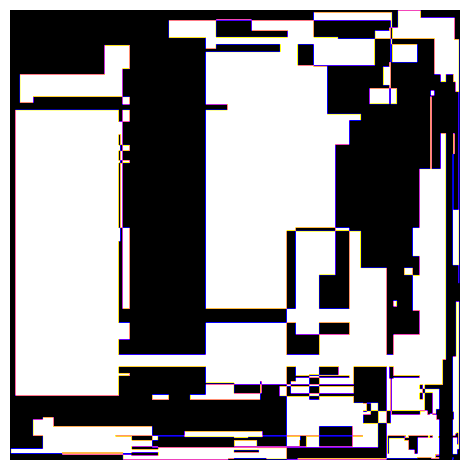

In [149]:
# create 3D numpy array to store the status of the lights
lights_history = np.zeros((total_no_instructions, 1000, 1000))

state_dict = {
    "on": 1,
    "off": 0
}

for i in range(total_no_instructions):
    curr_inst = day6_instructions[i]
    inst_split = curr_inst.split()
    
    begin_coord = inst_split[-3].split(",")
    end_coord = inst_split[-1].split(",")
    
    x_begin = int(begin_coord[0])
    x_end = int(end_coord[0])+1

    y_begin = int(begin_coord[1])
    y_end = int(end_coord[1])+1

    # set current set of lights as the previous
    lights_history[i] = lights_history[i-1]
    
    inst = inst_split[0]
    if inst == "toggle":
        lights_history[i][x_begin:x_end, y_begin:y_end] = 1 - lights_history[i][x_begin:x_end, y_begin:y_end]
        
    if inst == "turn":
        state = inst_split[1]
        lights_history[i][x_begin:x_end, y_begin:y_end] = state_dict[state]
        
fig, ax = plt.subplots()
im = ax.imshow(lights_history[i], cmap=plt.cm.gnuplot2)
plt.axis('off')
fig.tight_layout()
plt.show()

In [145]:
num_lit = np.unique(lights_history[-1], return_counts=True)
print(f"Number of lit lights is {num_lit[1][1]}")

Number of lit lights is 543903


# part 2

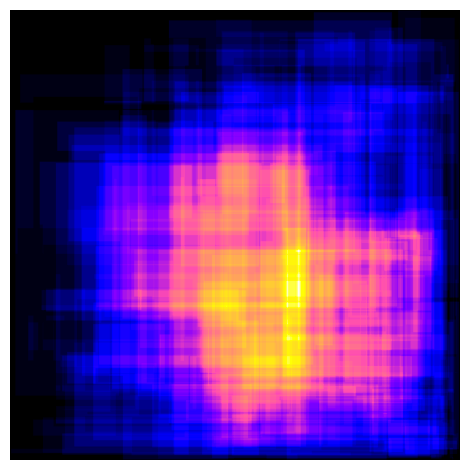

In [159]:
# create 3D numpy array to store the status of the lights
lights_history = np.zeros((total_no_instructions, 1000, 1000))

state_dict = {
    "on": 1,
    "off": -1
}

for i in range(total_no_instructions):
    curr_inst = day6_instructions[i]
    inst_split = curr_inst.split()
    
    begin_coord = inst_split[-3].split(",")
    end_coord = inst_split[-1].split(",")
    
    x_begin = int(begin_coord[0])
    x_end = int(end_coord[0])+1

    y_begin = int(begin_coord[1])
    y_end = int(end_coord[1])+1

    # set current set of lights as the previous
    lights_history[i] = lights_history[i-1]
    
    inst = inst_split[0]
    if inst == "toggle":
        lights_history[i][x_begin:x_end, y_begin:y_end] += 2
        
    if inst == "turn":
        state = inst_split[1]
        lights_history[i][x_begin:x_end, y_begin:y_end] += state_dict[state]
        lights_history[i][x_begin:x_end, y_begin:y_end] = np.where(lights_history[i][x_begin:x_end, y_begin:y_end]<0, 0, lights_history[i][x_begin:x_end, y_begin:y_end])
        
fig, ax = plt.subplots()
im = ax.imshow(lights_history[i], cmap=plt.cm.gnuplot2)
plt.axis('off')
fig.tight_layout()
plt.show()

In [160]:
total = np.sum(lights_history[-1])
print(f"Total brightness is {int(total)}")

Total brightness is 14687245
